# Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

## Load the data and generate summary statistics

In [71]:
# from google.colab import files
# uploaded = files.upload()

In [72]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [73]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [74]:
df.shape

(119390, 32)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [76]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Identify all missing values

In [77]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


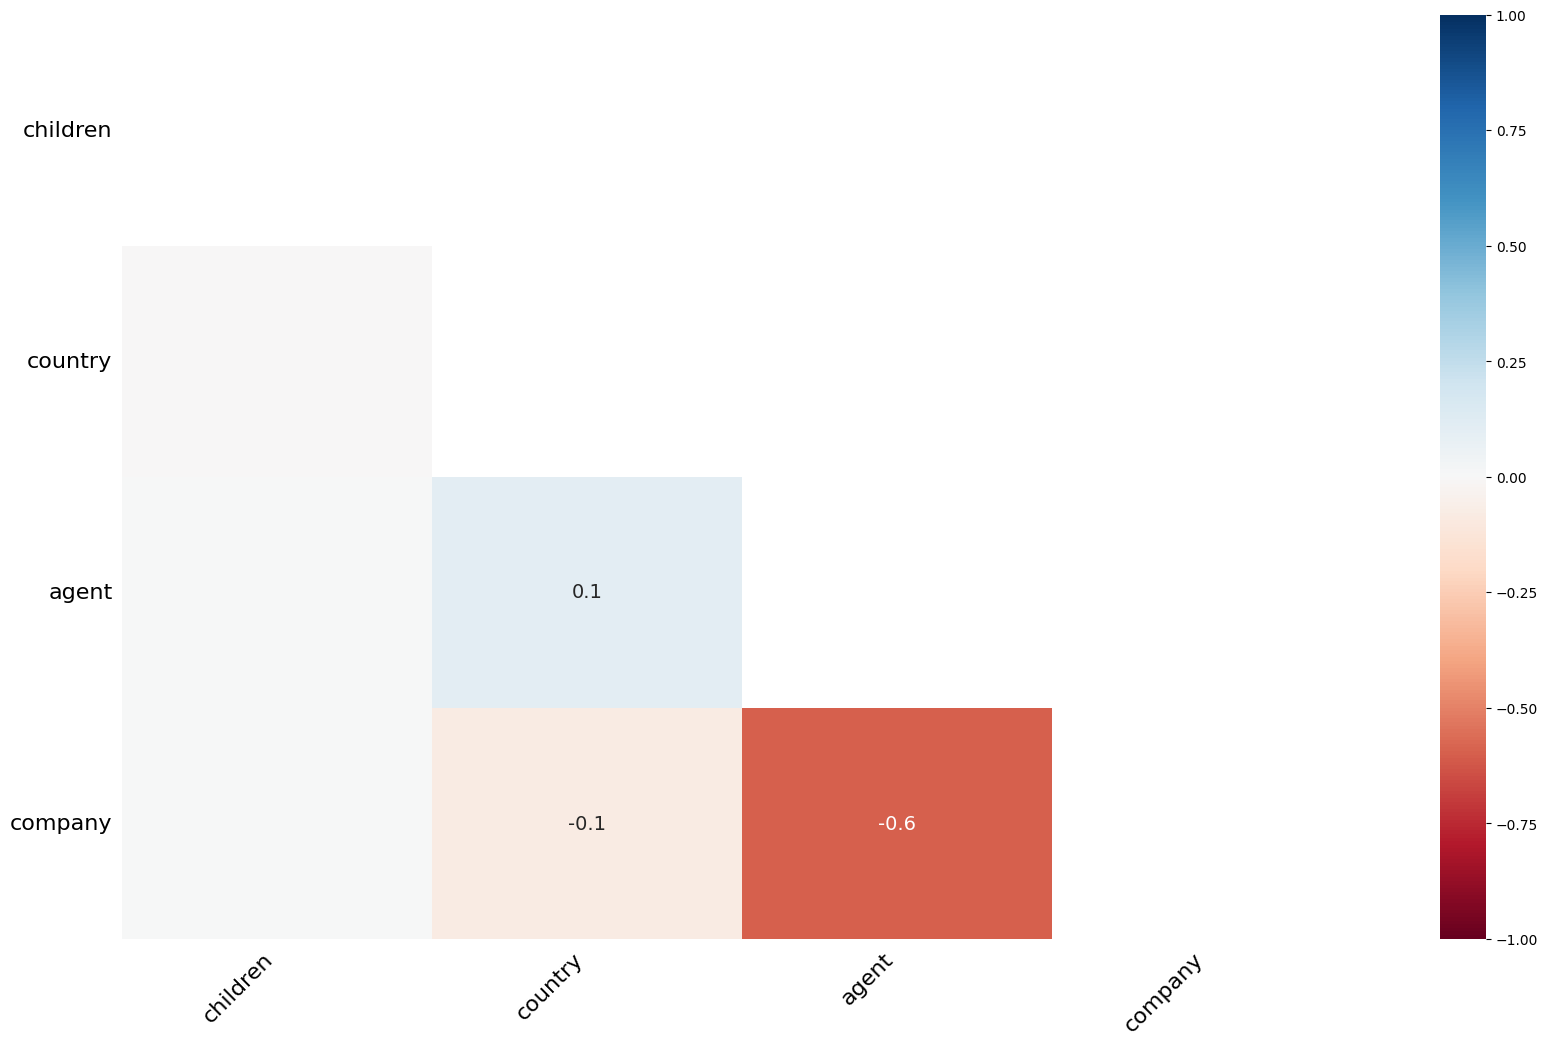

In [78]:
# Visualize missing data
msno.heatmap(df)
plt.show()

## Detect Outliers

In [79]:
num_cols = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'agent', 'company', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

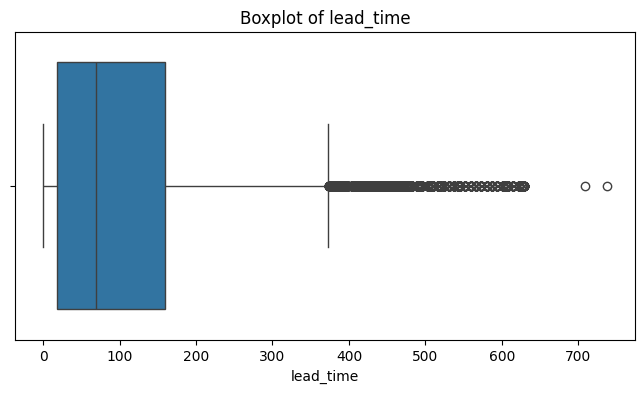

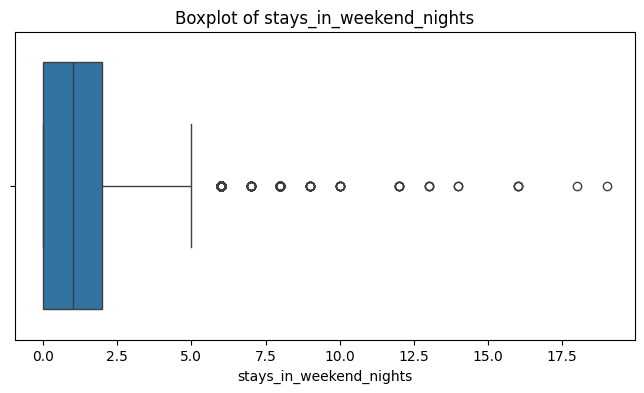

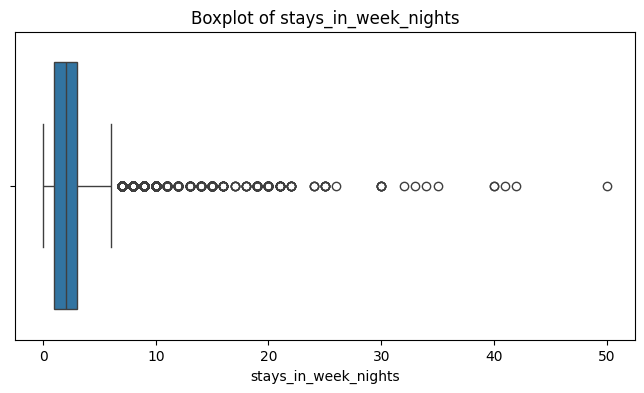

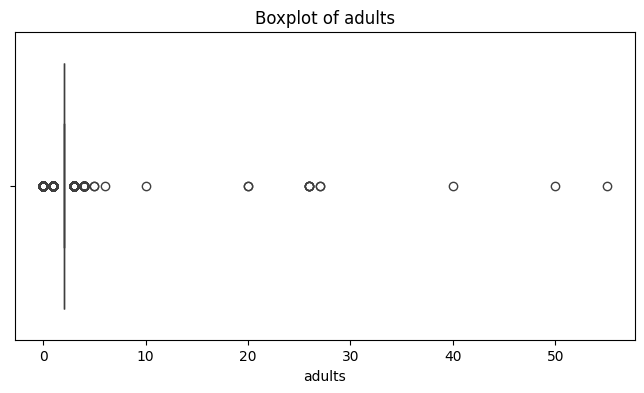

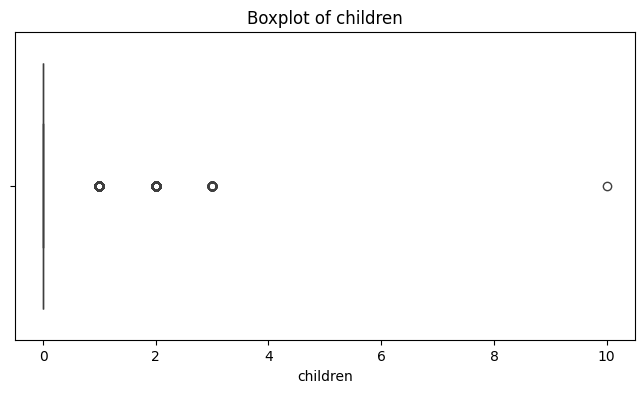

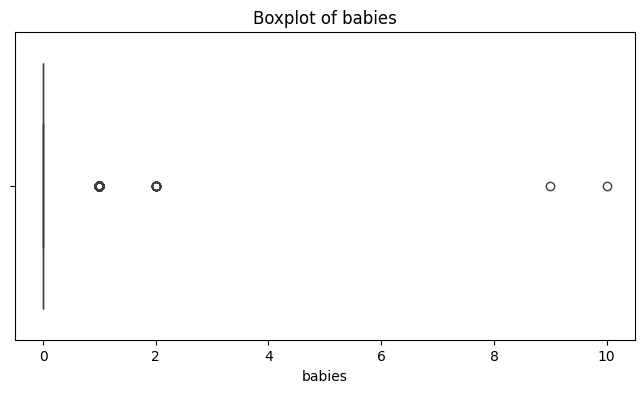

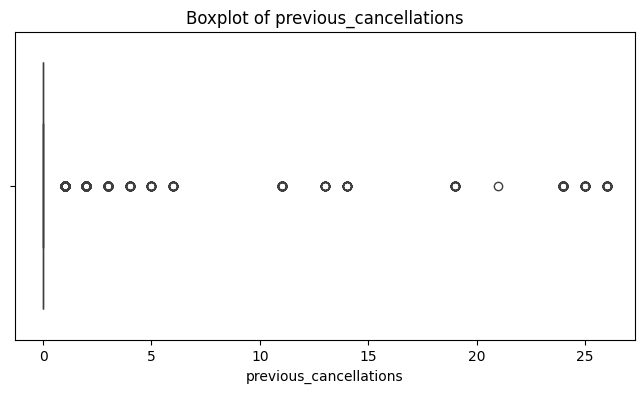

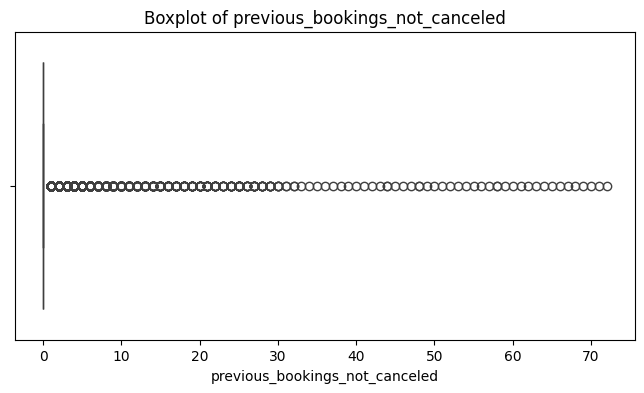

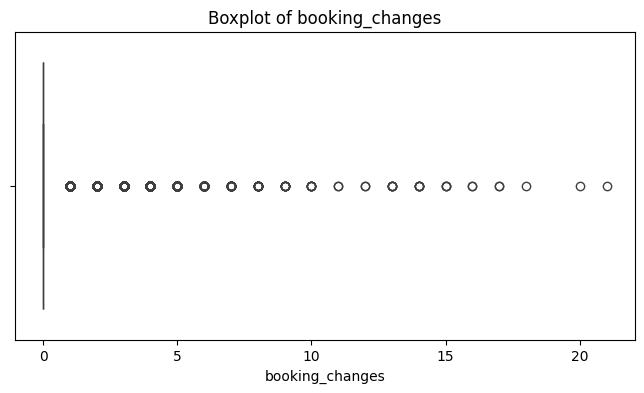

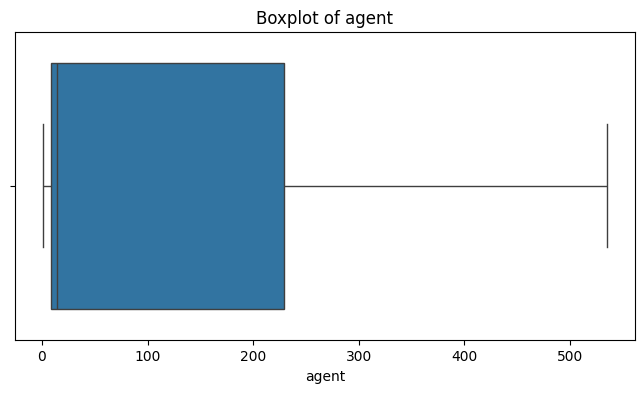

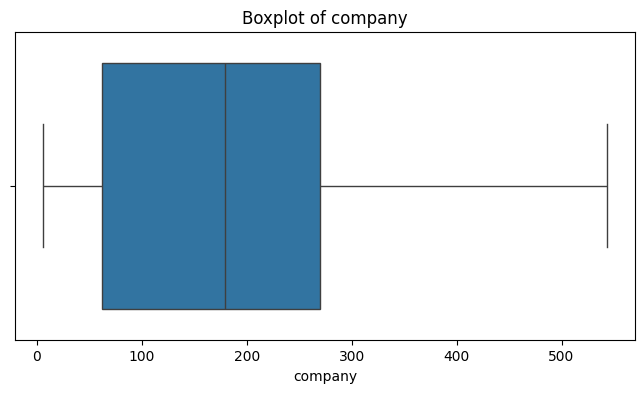

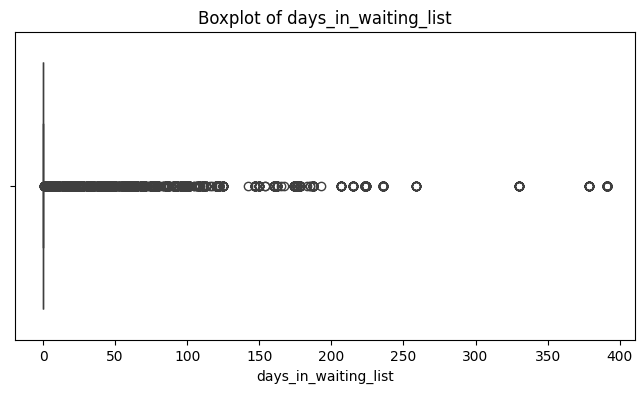

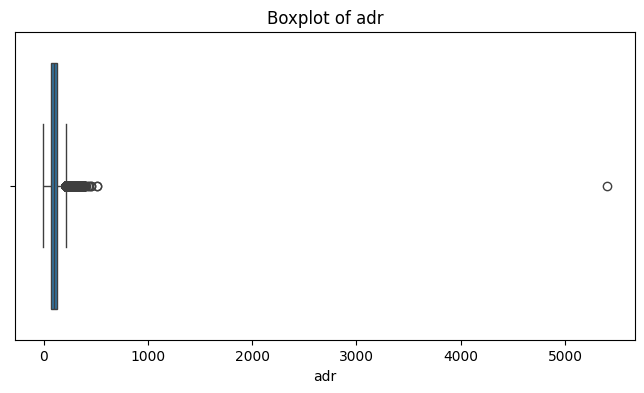

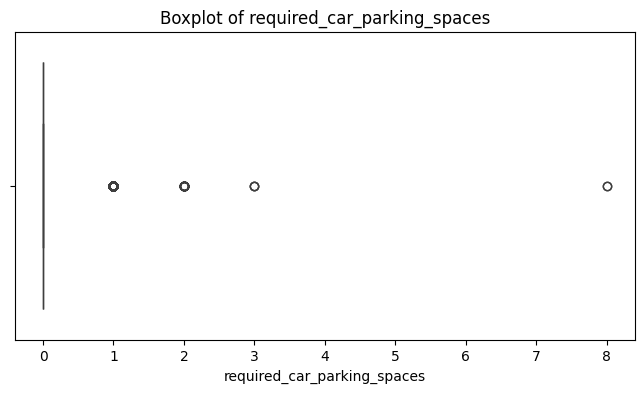

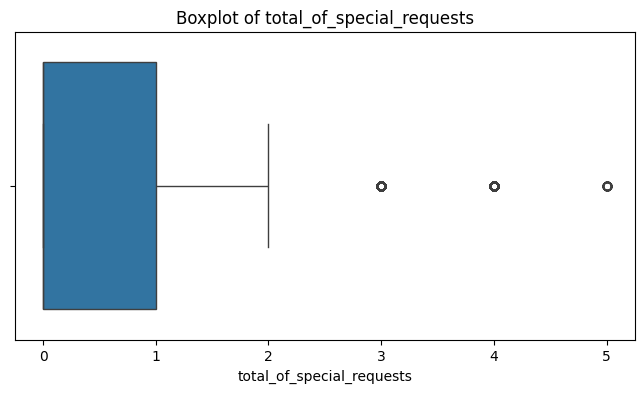

In [80]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [81]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "Outlier Count": len(outliers),
        "Outlier %": round((len(outliers) / len(df)) * 100, 2)
    }

# summary
outlier_report = pd.DataFrame(outlier_summary).T
print(outlier_report.sort_values(by='Outlier Count', ascending=False))

                                Outlier Count  Outlier %
adults                                29710.0      24.88
booking_changes                       18076.0      15.14
children                               8590.0       7.19
required_car_parking_spaces            7416.0       6.21
previous_cancellations                 6484.0       5.43
adr                                    3793.0       3.18
days_in_waiting_list                   3698.0       3.10
previous_bookings_not_canceled         3620.0       3.03
stays_in_week_nights                   3354.0       2.81
lead_time                              3005.0       2.52
total_of_special_requests              2877.0       2.41
babies                                  917.0       0.77
stays_in_weekend_nights                 265.0       0.22
company                                   0.0       0.00
agent                                     0.0       0.00


## Data Exploration & Quality Report

## Dataset Overview

* The dataset contains **119,390 rows** and **32 columns**.
* It includes:

  * 16 numerical columns (e.g., `lead_time`, `adr`, `adults`).
  * 12 categorical columns (e.g., `hotel`, `meal`, `deposit_type`).
  * 2 date/identifier columns (`reservation_status_date`, `reservation_status`).

This is a fairly large dataset that is suitable for modeling, but it requires careful cleaning.

---
## Descriptive Statistics Highlights

* **Lead time**: Average \~104 days, max 737 days (\~2 years).
* **Stay duration**:

  * Week nights: Median 2, but max 50.
  * Weekend nights: Usually 0–1, but max 19.
* **Group size**:

  * Adults: Normally 1–2, but max 55 (likely error).
  * Children/babies: Typically 0, but up to 10.
* **ADR (Average Daily Rate)**: Median \~95, max 5400 (unrealistic).
* **Waiting list**: Mostly 0, but max 391 days.
* **Booking history**: Up to 26 cancellations and 72 non-canceled past bookings.

There are many realistic values but also some extreme spikes.

---

## Missing Values

* **Company**: Missing in \~94% of rows → too sparse to be useful.
* **Agent**: Missing in \~13.7% of rows.
* **Country**: Missing in \~0.4% of rows.
* **Children**: Only 4 missing → negligible.

Most columns are complete, but some will require imputation or removal.

---

## Outlier Analysis

Using boxplots and the IQR method:

* **Adults**: \~25% flagged, max 55 (unrealistic).
* **Booking changes**: \~15% flagged, up to 21 changes.
* **Children**: \~7% flagged, up to 10.
* **Car parking spaces**: \~6% flagged, unusually high requests.
* **Previous cancellations**: \~5% flagged, up to 26.
* **ADR**: \~3% flagged, extreme values up to 5400.
* **Days in waiting list**: \~3% flagged, some waited hundreds of days.
* **Other columns** (babies, stays, lead\_time) also show smaller amounts of outliers.

Some outliers are likely **errors** (e.g., ADR = 5400, Adults = 55), while others are **rare but valid** cases.




# Phase 2: Data Cleaning (The Core of the Project)

## Handling Missing Values

In [82]:
# Drop company as more than 50% of the column is missing
df = df.drop(columns=['company'])

In [83]:
# agent fill missing values will be replaced with 0 as there is no agent
df['agent'] = df['agent'].fillna(0)

# country  fill missing with mode
most_frequent_country = df['country'].mode()[0]
df['country'] = df['country'].fillna(most_frequent_country)

# children very few missing values, we’ll fill with the median
df['children'] = df['children'].fillna(df['children'].median())

## Remove duplicates

In [84]:
df = df.drop_duplicates()

## Handle Outliers

In [85]:
# For ADR , some values are unrealistic (like 5400) We'll cap anything above 1000 to 1000.
df['adr'] = np.where(df['adr'] > 1000, 1000, df['adr'])

# for adults cap at 10 since we saw values like 55 which are unrealistic.
df['adults'] = np.where(df['adults'] > 10, 10, df['adults'])

# For children and babies also cap at 10 just in case
df['children'] = np.where(df['children'] > 10, 10, df['children'])
df['babies']   = np.where(df['babies'] > 10, 10, df['babies'])

## Fix Data Types

In [86]:
# Convert categorical columns
categorical_cols = [
    'hotel', 'arrival_date_month', 'meal', 'country',
    'market_segment', 'distribution_channel',
    'reserved_room_type', 'assigned_room_type',
    'deposit_type', 'customer_type', 'reservation_status'
]
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [87]:
# Convert integer columns
int_cols = [
    'is_canceled', 'lead_time', 'arrival_date_year',
    'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'babies', 'is_repeated_guest',
    'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'days_in_waiting_list',
    'required_car_parking_spaces', 'total_of_special_requests'
]
for col in int_cols:
    df[col] = df[col].astype(int)

In [88]:
# Continuous numeric column
df['adr'] = df['adr'].astype(float)

In [89]:
#  Date column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Phase 3: Feature Engineering & Preprocessing

## Remove Data Leakage

In [90]:
df = df.drop(columns=['reservation_status', 'reservation_status_date'])

## Create new Features

In [91]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = ((df['children'] + df['babies']) > 0).astype(int)

## Encoding Categorical Variables

In [92]:
# One-hot encoding for low-cardinality categorical columns
low_cardinality = ['meal', 'market_segment', 'distribution_channel',
                   'reserved_room_type', 'assigned_room_type',
                   'deposit_type', 'customer_type', 'hotel', 'arrival_date_month']

df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

In [93]:
# Frequency encoding for high-cardinality columns
country_freq = df['country'].value_counts().to_dict()
df['country_freq'] = df['country'].map(country_freq)
df = df.drop(columns=['country'])

## Final Preperation

In [94]:
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)